In [1]:
# we are going to work again on the Titanic data set:


import pandas as pd
df=pd.read_csv('titanic-passengers.csv', sep=";")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


###Exercice 1: Apply logistic regression. 

In [2]:
##Step1: Data PREPROCESSING

# Survived culumn 

Survived_to_numerical = { "Survived": {"No": 0, "Yes": 1}}

df.replace(Survived_to_numerical, inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [3]:
# Sex culumn 
Sex_to_numerical = { "Sex": {"male": 0, "female": 1}}

df.replace(Sex_to_numerical, inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.00,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.65,F G73,S


In [4]:
# Cabin culumn: Are there a lot of missing values? 

print(df['Cabin'].value_counts())
print(df['Cabin'].isnull().sum())

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
D47            1
B79            1
B86            1
C7             1
C49            1
Name: Cabin, Length: 147, dtype: int64
687


In [5]:
# Let's replace the voids with inknown cabin
df['Cabin'].fillna('NC', inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NC,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NC,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NC,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,NC,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,NC,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,NC,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,NC,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,NC,S


In [6]:
# to_numeric for  Cabin column
from sklearn.preprocessing import LabelEncoder



encoder=LabelEncoder()
df['Cabin']=encoder.fit_transform(df['Cabin'])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,146,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,146,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,146,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,38,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,146,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,146,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,146,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,146,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,146,S


##Step1: Data Visualisation


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d1606cf8>,
      dtype=object)

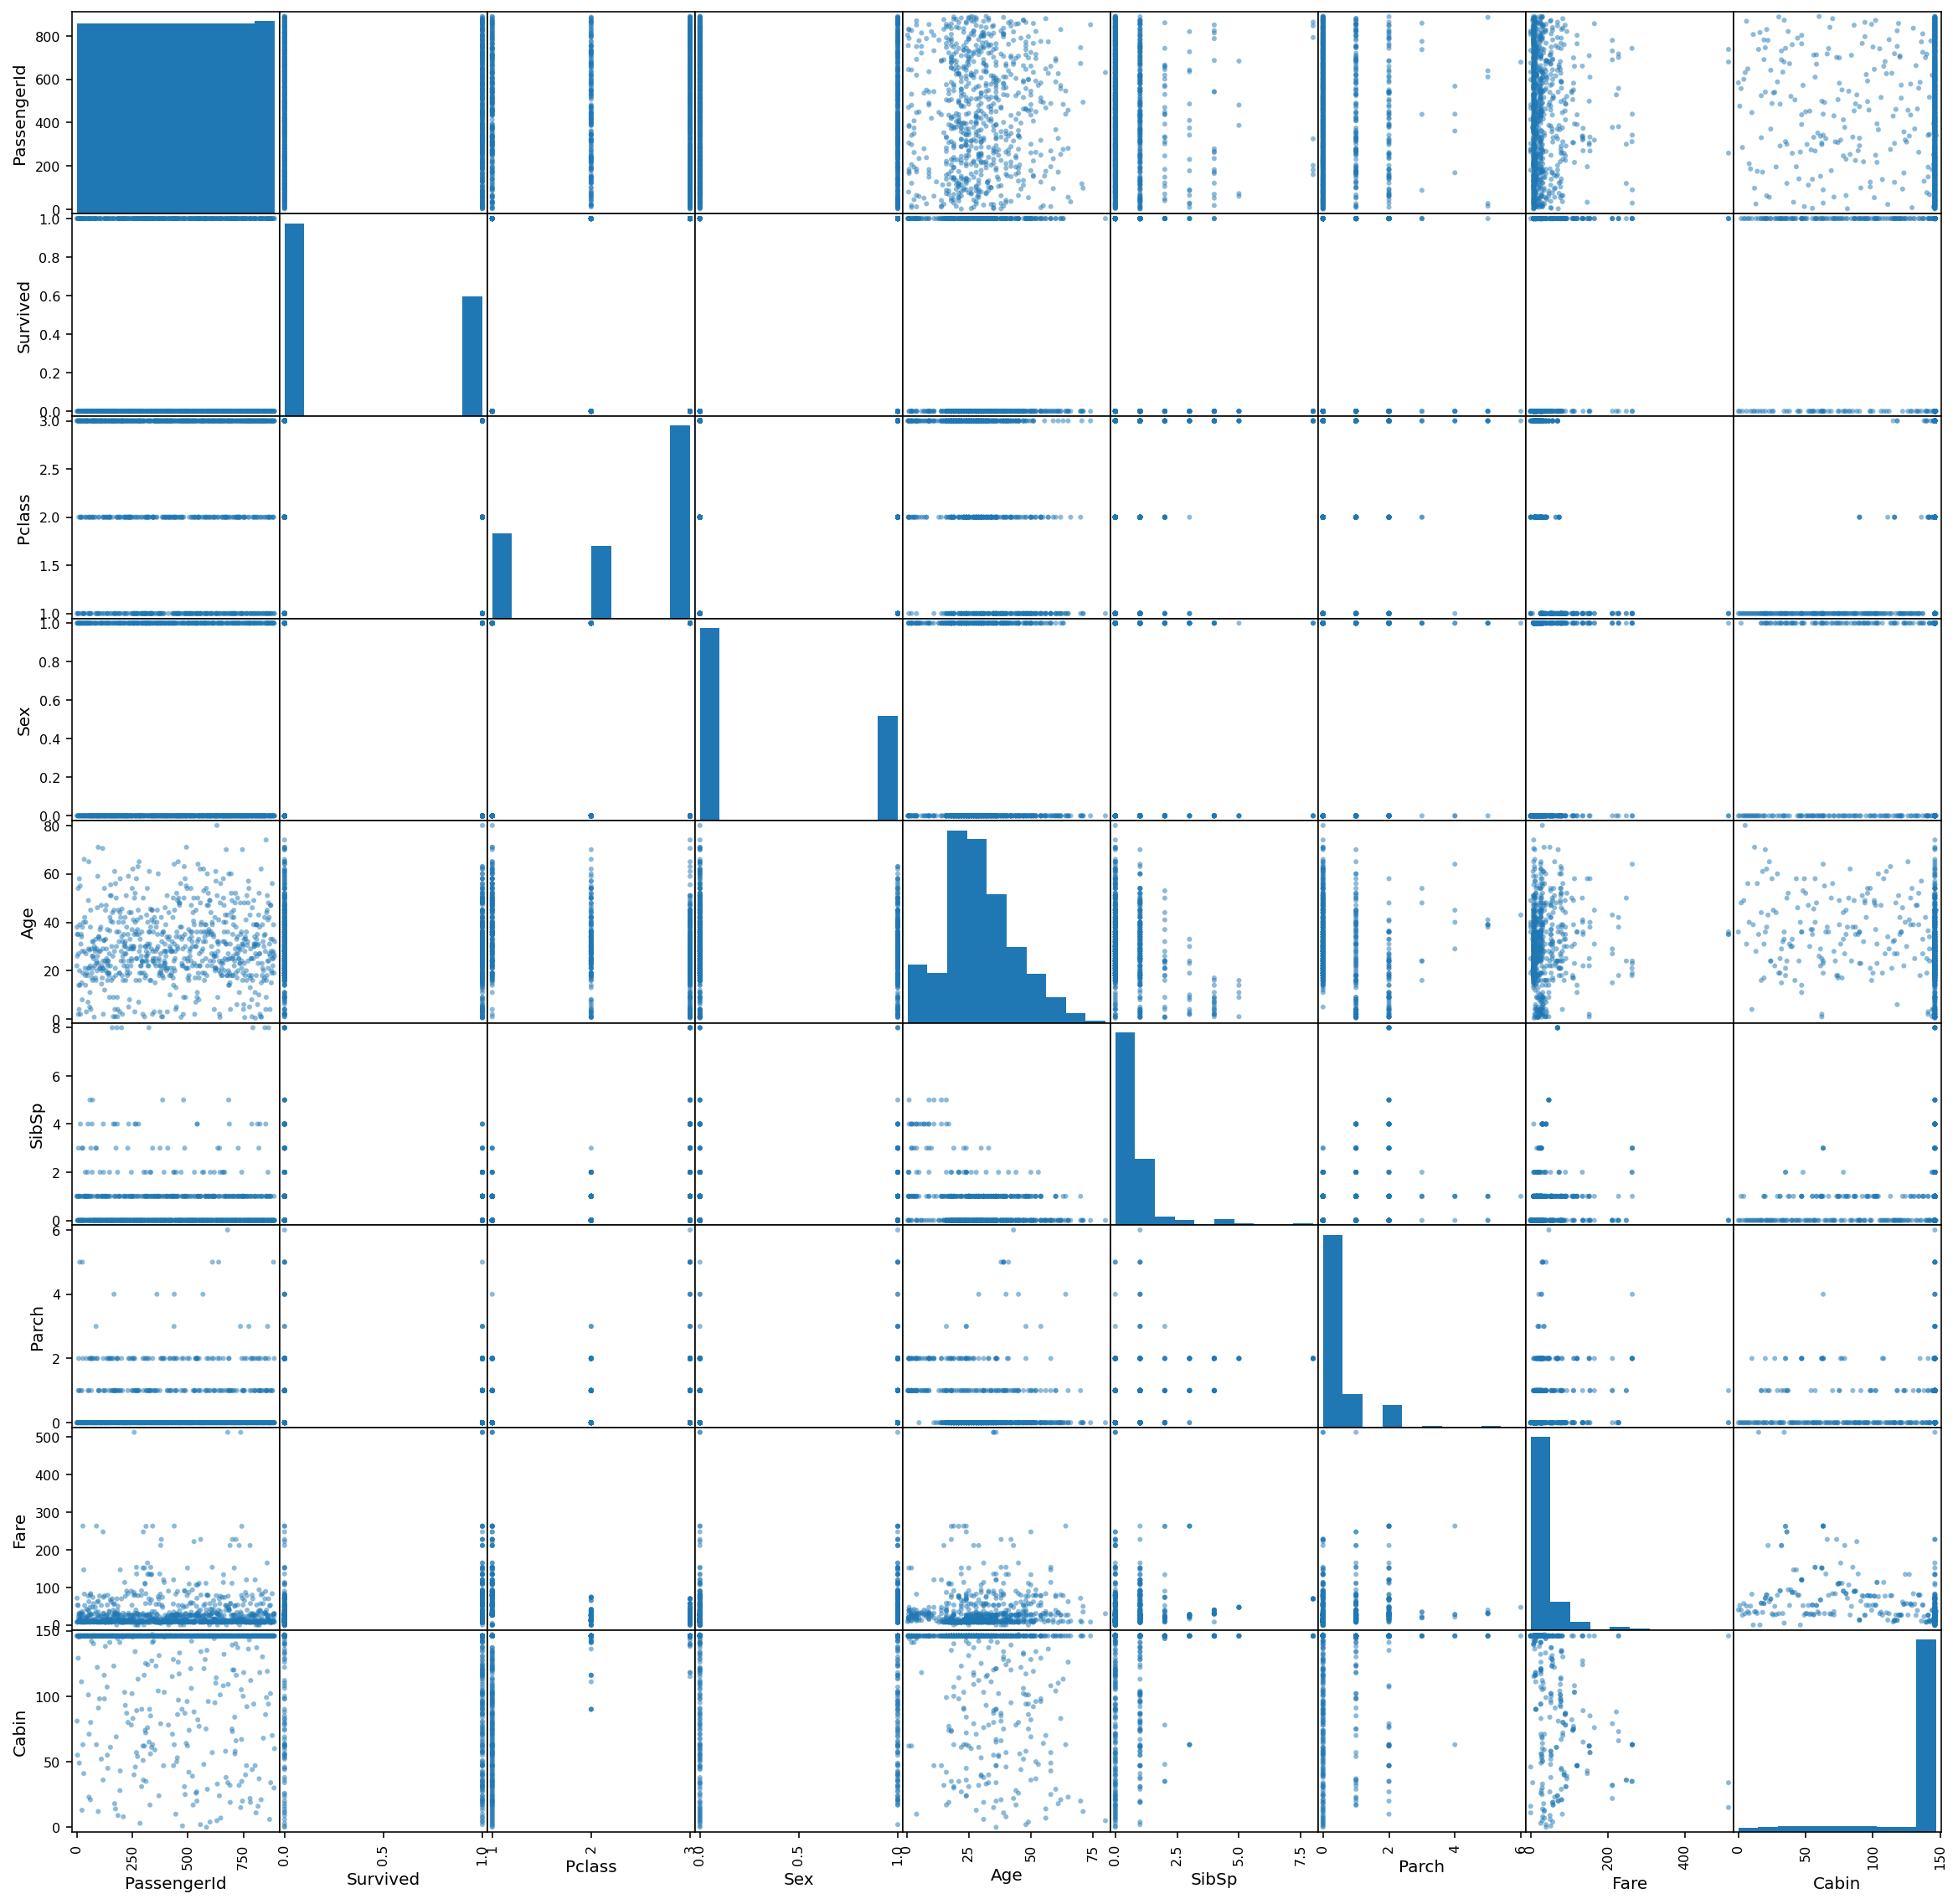

In [7]:
pd.plotting.scatter_matrix(df, figsize =( 20 , 20 ))

Conclusion: although we do not observe a sigmoid function distribution. we have retained the following features: "Pclass", "Sex", "SibSp", "Parch", "Cabin". That we will add one by one to our model.

In [8]:
## Step 3: The model

In [9]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["Pclass"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


In [10]:
## Add column "Sex"

#features extraction
x=df[["Pclass", "Sex"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


In [11]:
## Add column "SibSp"

#features extraction
x=df[["Pclass", "Sex", "SibSp"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


In [12]:
## Add column "Parch"

#features extraction
x=df[[ "Pclass", "Sex", "SibSp", "Parch"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


In [13]:
## Add column "Cabin"

#features extraction
x=df[[ "Pclass", "Sex", "SibSp", "Parch","Cabin"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


Adding the columns () did not improve the results of the model.
The right model for a logistic regression uses: "Sex", "Age", "SibSp",

2. Use confusion matrix to validate your model. 

In [14]:
#features extraction
x=df[[ "Pclass", "Sex", "SibSp"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


Exercice 2. Use confusion matrix to validate your model. 

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       189
           1       0.75      0.69      0.72       123

    accuracy                           0.79       312
   macro avg       0.78      0.77      0.77       312
weighted avg       0.78      0.79      0.78       312



In [16]:
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0   1
Actual            
0          160  29
1           38  85


#conclusion:
#Precision: a good proportion of solutions found by this model are relevant. the system is able to reject irrelevant solutions.
#Recal: a good proportion of the relevant solutions are found by this model. the system seems to provide most of the relevant solutions.
#F-measure: overall the system is capable of giving most of the relevant solutions and refusing the others
#I validate the model with some reservations

Exercice 3 . Another validation matrix for classification is ROC / AUC

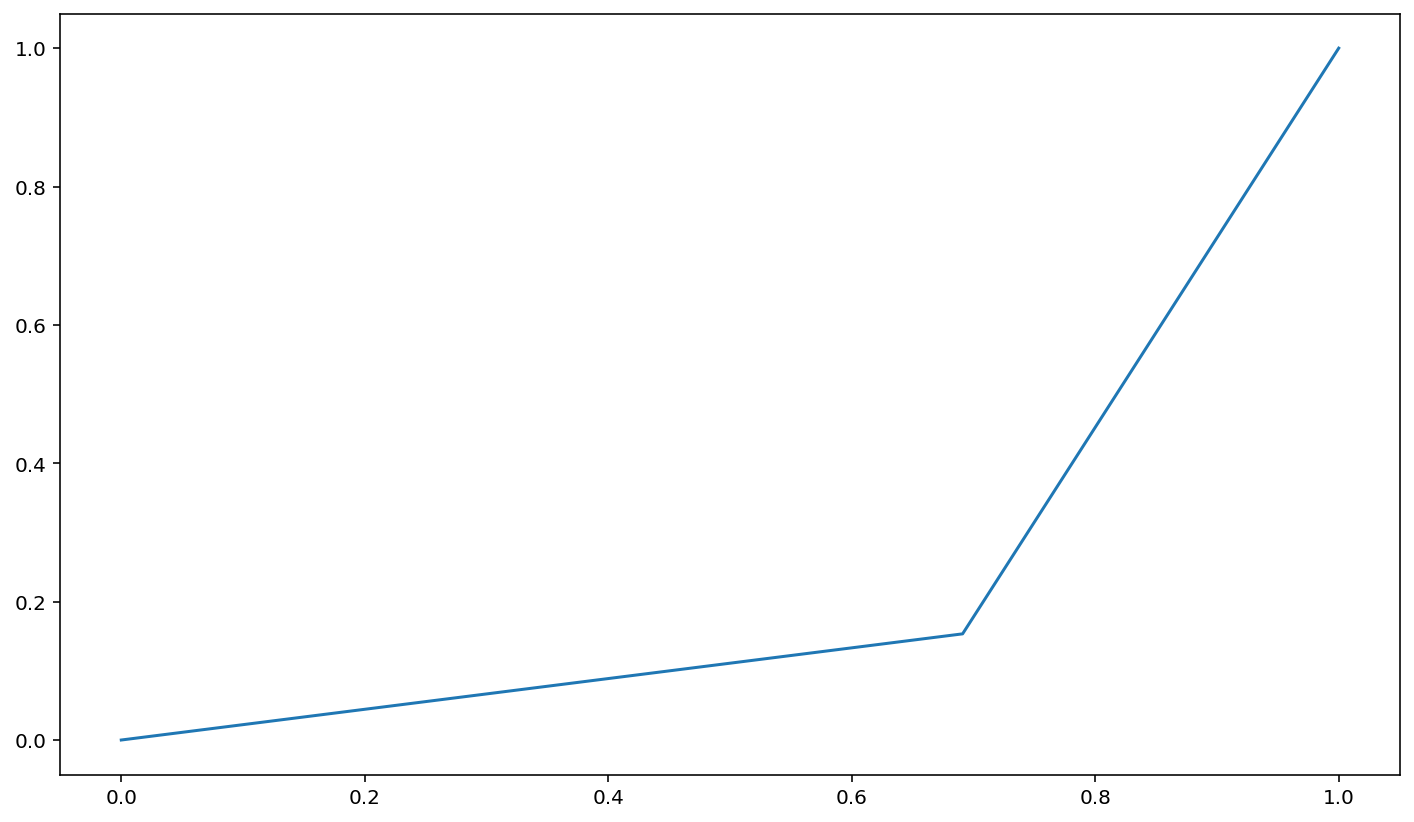

AUC: 0.2311911214350239


In [18]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

y_true = y_test# true labels
y_probas = y_pred# predicted results
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

#ROC curve
A ROC (receiver operating characteristic) curve is a graph representing the performance of a classification model for all classification thresholds. This curve plots the rate of true positives as a function of the rate of false positives:

True positive rate
False positive rate

in our case the curve has a logaritmic shape! whose therefore for a false positive rate given our model provides us with a low rate of true positives! therefore the performance of our model is reduced!


#AUC: area under the ROC curve
AUC: This value measures the entire two-dimensional area located under the entire ROC curve (by integrals) from (0.0) to (1.1).

AUC provides an aggregated measure of performance for all possible classification thresholds. The AUC can be interpreted as a measure of the probability that the model will classify a random positive example above a random negative example.

AUC values are in the range of 0 to 1. A model in which 100% of the predictions are wrong has an AUC of 0.0. If all of his predictions are correct, his AUC is 1.0.

With a 0.23. our conclusion observed on the ROC curve on the weak performance of this model is confirmed according to this method